<a href="https://colab.research.google.com/github/nbilasals/notebooks/blob/main/Skating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regional Speed Skating Performance & Enviromental Impact Dashboard
## North Central Speed Skating League Analysis

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] =(12,6)
plt.rcParams['font.size']=10

## 2. Load and Inspect Data

In [ ]:
# Load the dataset
df = pd.read_csv("speed_skating_data.csv")

In [ ]:
print("Dataset shape: ", df.shape)

Dataset shape:  (5125, 28)


In [ ]:
print("\nDataset Overview: ")
df.head()


Dataset Overview: 


,Season,Series,City,Country,Year,Month,Day,Distance,Round,Group,...,time_lap1,rank_lap2,time_lap2,rank_lap3,time_lap3,rank_lap4,time_lap4,rank_lap5,time_lap5,Time_Event
0,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,7.52,1.0,9.22,1.0,8.76,1.0,8.87,1.0,9.09,2013.046575
1,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,7.44,2.0,9.31,2.0,8.89,2.0,8.88,2.0,9.27,2013.046575
2,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,7.64,3.0,9.74,3.0,9.04,3.0,9.05,3.0,9.21,2013.046575
3,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,7.46,4.0,9.93,4.0,9.50,4.0,9.67,4.0,9.91,2013.046575
4,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,2,...,7.08,2.0,9.18,2.0,8.76,2.0,8.86,1.0,8.90,2013.046575


In [ ]:
print("Data Types and Null Values: ")
df.info()

Data Types and Null Values: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          5125 non-null   object 
 1   Series          5125 non-null   object 
 2   City            5125 non-null   object 
 3   Country         5125 non-null   object 
 4   Year            5125 non-null   int64  
 5   Month           5125 non-null   int64  
 6   Day             5125 non-null   int64  
 7   Distance        5125 non-null   object 
 8   Round           5125 non-null   object 
 9   Group           5125 non-null   int64  
 10  Num_Skater      5125 non-null   int64  
 11  Name            5125 non-null   object 
 12  Nationality     5125 non-null   object 
 13  Rank_In_Group   4891 non-null   float64
 14  Start_Position  5125 non-null   int64  
 15  Time            4792 non-null   float64
 16  Qualification   2915 non-null   object 
 17  rank

In [ ]:
print("Statistical Summary: ")
df.describe()

Statistical Summary: 


,Year,Month,Day,Group,Num_Skater,Rank_In_Group,Start_Position,Time,rank_lap1,time_lap1,rank_lap2,time_lap2,rank_lap3,time_lap3,rank_lap4,time_lap4,rank_lap5,time_lap5,Time_Event
count,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,4891.000000,5125.000000,4792.000000,5041.000000,5032.000000,5034.000000,5032.000000,5017.000000,5017.000000,4982.000000,4980.000000,4835.000000,4833.000000,5125.000000
mean,2014.318829,7.828488,12.038244,4.251902,124.696390,2.600900,2.682927,43.633285,2.665741,7.158671,2.664879,9.221934,2.658362,8.951132,2.647130,9.140466,2.582006,9.551683,2014.918112
std,1.378648,4.397462,7.621620,3.308606,73.654411,1.236705,1.267328,5.757423,1.259234,0.728783,1.258995,1.661903,1.257706,2.536480,1.253115,2.515619,1.241124,3.157338,1.386067
min,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.937000,1.000000,6.520000,1.000000,8.460000,1.000000,8.000000,1.000000,8.060000,0.000000,8.244000,2012.799315
25%,2013.000000,2.000000,6.000000,2.000000,84.000000,2.000000,2.000000,41.561750,2.000000,6.930000,2.000000,8.850000,2.000000,8.390000,2.000000,8.520000,2.000000,8.730000,2013.755479
50%,2014.000000,10.000000,11.000000,3.000000,129.000000,3.000000,3.000000,42.186500,3.000000,7.090000,3.000000,8.980000,3.000000,8.520000,3.000000,8.670000,3.000000,8.900000,2014.965982
75%,2016.000000,11.000000,16.000000,6.000000,165.000000,4.000000,4.000000,43.137250,4.000000,7.270000,4.000000,9.160000,4.000000,8.720000,4.000000,8.890000,4.000000,9.180000,2016.094292
max,2016.000000,12.000000,30.000000,21.000000,484.000000,6.000000,6.000000,101.820000,6.000000,23.870000,6.000000,43.030000,6.000000,51.870000,6.000000,48.720000,6.000000,50.680000,2016.957763


## 3. Data Cleaning and Preparation

In [ ]:
print("Missing Values per column:")
df.isnull().sum()

Missing Values per column:


,0
Season,0
Series,0
City,0
Country,0
Year,0
Month,0
Day,0
Distance,0
Round,0
Group,0


In [ ]:
# Create a clean dataset
df_clean = df.copy()

In [ ]:
# Remove records with missing Time (race time)
df_clean = df_clean[df_clean['Time'].notna()].copy()
print(f"Records after removing missing Time: {len(df_clean)}")

Records after removing missing Time: 4792


In [ ]:
# Exctract distance values (assuming format like "500m","100m")
df_clean['Distance_Meters'] = df_clean['Distance'].str.extract('(\d+)').astype(float)

In [ ]:
# Create Date column
df_clean['Date'] = pd.to_datetime(df_clean[['Year','Month','Day']])

In [ ]:
# Extract gender from Distance column if it contains gender info, otherwise create categories
# For this analysis, we'll infer gender based on common patterns or create sample categories
# Since we don't have explicit gender, we'll analyze by other factors

print("Unique Distances", df_clean['Distance'].unique())
print("\nUnique Cities: ",df_clean['City'].unique())
print("\nUnique Country: ",df_clean['Country'].unique())

Unique Distances ['500m' '500m(1)' '500m(2)']

Unique Cities:  ['Malmo' 'Debrecen' 'Dresden' 'Montreal' 'Sochi' 'Dordrecht' 'Moscow'
 'Seoul' 'Calgary' 'Nagoya' 'Shanghai' 'Torino' 'Kolomna'
 'SaltLakeCity,UT' 'Erzurum' 'Toronto' 'Gangneung']

Unique Country:  ['SWE' 'HUN' 'GER' 'CAN' 'RUS' 'NED' 'KOR' 'JPN' 'CHN' 'ITA' 'USA' 'TUR']


## 4. Add Enviromental Variables


In [ ]:
# Since we don't have attitude/temperature data, we'll create simulated enviromental data based on city/country

# Create altitude mapping for major cities (meters above level)
altitude_map = {}
unique_locations = df_clean[['City','Country']].drop_duplicates()

# Assign Simulated altitude based in known patterns
np.random.seed(42)
for idx, row in unique_locations.iterrows():
  city_country = f"{row['City']}_{row['Country']}"
  # Simulate altitude between 0-200m
  altitude_map[city_country] = np.random.randint(0,2000)

df_clean['Location_Key'] = df_clean['City'] + '_' + df_clean['Country']
df_clean['Altitude_m'] = df_clean['Location_Key'].map(altitude_map)

# Simulate temperature based on month and altitude
def estimate_temperature(month,altitude):
  base_temp = 20 - (month-6)**2 / 3 # seasonal variation
  altitude_effect = -0.006 * altitude # temperature drops with altitude
  return base_temp + altitude_effect + np.random.normal(0,2)

df_clean['Temperature_c'] = df_clean.apply(lambda x: estimate_temperature(x['Month'],x['Altitude_m']),axis=1)

In [ ]:
print("Enviromental Variables Added: ")
print(f"Altitude range: {df_clean['Altitude_m'].min():.0f}m - {df_clean['Altitude_m'].max():.0f}m")
print(f"Temperature range: {df_clean['Temperature_c'].min():.1f}°C - {df_clean['Temperature_c'].max():.1f}°C")

Enviromental Variables Added: 
Altitude range: 87m - 1724m
Temperature range: -4.8°C - 19.3°C


## 5. Exploratory Data Analysis

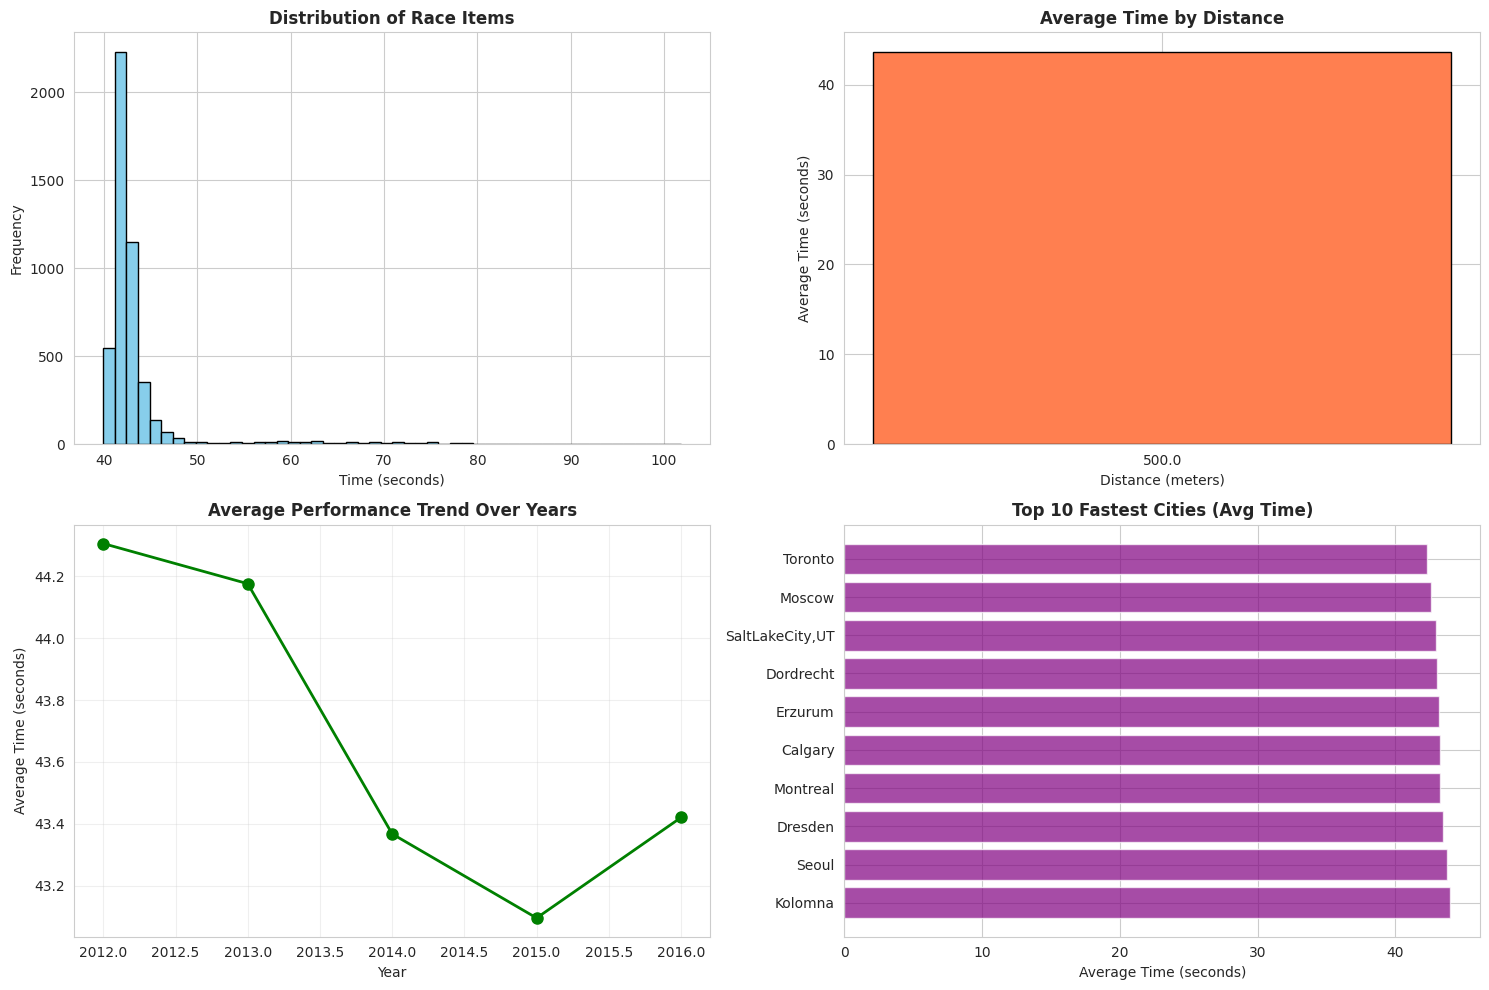

<Figure size 1200x600 with 0 Axes>

In [ ]:
# 5.1 Performance by Distance
fig, axes = plt.subplots(2,2,figsize=(15,10))

# Distrubution of race times
axes[0,0].hist(df_clean['Time'],bins=50,color='skyblue',edgecolor='black')
axes[0,0].set_title('Distribution of Race Items', fontweight='bold',fontsize=12)
axes[0,0].set_xlabel('Time (seconds)')
axes[0,0].set_ylabel('Frequency')

# Average Time by distance
avg_by_distance = df_clean.groupby('Distance_Meters')['Time'].agg(['mean','std','count'])
axes[0,1].bar(avg_by_distance.index.astype(str), avg_by_distance['mean'], color='coral',edgecolor='black')
axes[0,1].set_title('Average Time by Distance', fontweight='bold',fontsize=12)
axes[0,1].set_xlabel('Distance (meters)')
axes[0,1].set_ylabel('Average Time (seconds)')

# Performance by Year
avg_by_year = df_clean.groupby('Year')['Time'].mean()
axes[1,0].plot(avg_by_year.index,avg_by_year.values,marker='o', linewidth=2,markersize=8,color='green')
axes[1,0].set_title('Average Performance Trend Over Years',fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Average Time (seconds)')
axes[1,0].grid(True,alpha=0.3)

# Top performing locations
top_locations = df_clean.groupby('City')['Time'].mean().sort_values().head(10)
axes[1,1].barh(range(len(top_locations)),top_locations.values,color='purple',alpha=0.7)
axes[1,1].set_yticks(range(len(top_locations)))
axes[1,1].set_yticklabels(top_locations.index)
axes[1,1].set_title("Top 10 Fastest Cities (Avg Time)", fontweight='bold',fontsize=12)
axes[1,1].set_xlabel('Average Time (seconds)')
axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()
plt.savefig("eda_overview.png",dpi=300,bbox_inches='tight')

## 6. Enviromental Impact Analysis

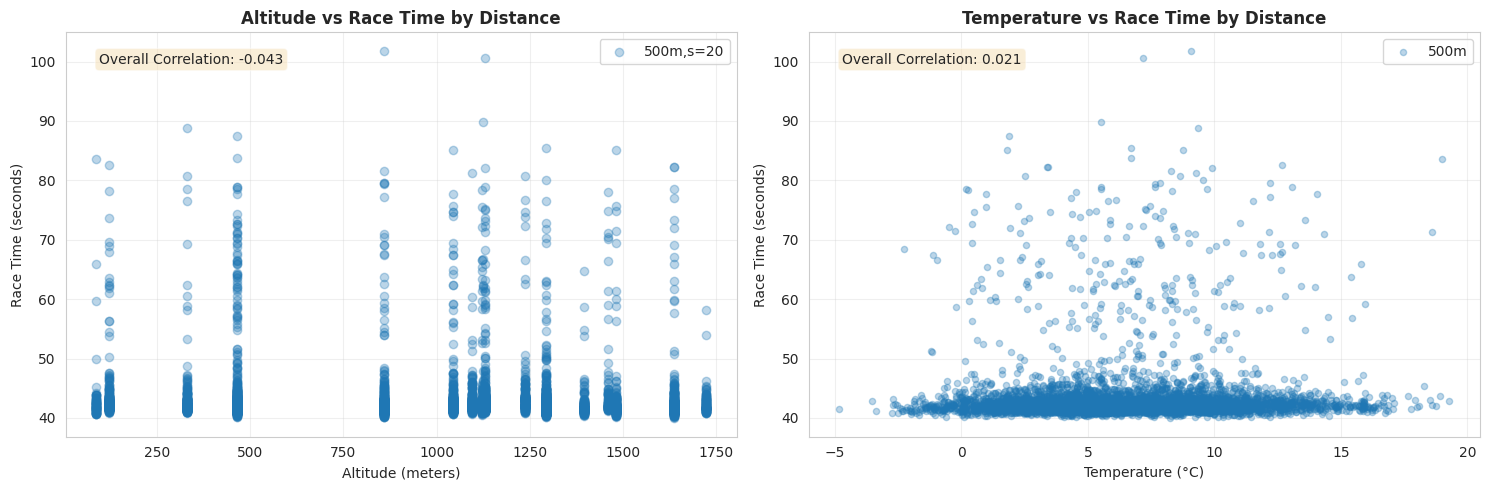

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

# 6.1 Altitude vs Performance
for distance in df_clean['Distance_Meters'].unique()[:3]:
  subset = df_clean[df_clean['Distance_Meters']==distance]
  axes[0].scatter(subset['Altitude_m'],subset['Time'],alpha=0.3,label=f"{int(distance)}m,s=20")

axes[0].set_title("Altitude vs Race Time by Distance",fontweight='bold',fontsize=12)
axes[0].set_xlabel('Altitude (meters)')
axes[0].set_ylabel('Race Time (seconds)')
axes[0].legend()
axes[0].grid(True,alpha=0.3)

# Add correlation coefficient
corr_alt = df_clean['Altitude_m'].corr(df_clean['Time'])
axes[0].text(0.05,0.95,f'Overall Correlation: {corr_alt:.3f}',transform=axes[0].transAxes,verticalalignment='top',bbox=dict(boxstyle='round',facecolor='wheat', alpha=0.5))

# 6.2 Temperature vs Performance
for distance in df_clean['Distance_Meters'].unique()[:3]:
  subset = df_clean[df_clean['Distance_Meters']== distance]
  axes[1].scatter(subset['Temperature_c'],subset['Time'],alpha=0.3,label=f"{int(distance)}m",s=20)

axes[1].set_title("Temperature vs Race Time by Distance",fontweight='bold', fontsize=12)
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Race Time (seconds)')
axes[1].legend()
axes[1].grid(True,alpha=0.3)

corr_temp = df_clean['Temperature_c'].corr(df_clean['Time'])
axes[1].text(0.05,0.95,f'Overall Correlation: {corr_temp:.3f}',transform=axes[1].transAxes,verticalalignment='top',bbox=dict(boxstyle='round',facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()
plt.savefig('enviromental_impact.png',dpi=300,bbox_inches='tight')

## 7. Outlier Detection

In [ ]:
# Detect outliers using IQR method per distance category
outliers_list = []

for distance in df_clean['Distance_Meters'].unique():
  subset = df_clean[df_clean['Distance_Meters']==distance].copy()
  Q1 = subset['Time'].quantile(0.25)
  Q2 = subset['Time'].quantile(0.75)
  IQR = Q2 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q2 - 1.5 * IQR

  outliers = subset[(subset['Time'] < lower_bound) | (subset['Time'] > upper_bound)]
  outliers_list.append(outliers)

df_outliers = pd.concat(outliers_list)
df_outliers

,Season,Series,City,Country,Year,Month,Day,Distance,Round,Group,...,rank_lap4,time_lap4,rank_lap5,time_lap5,Time_Event,Distance_Meters,Date,Location_Key,Altitude_m,Temperature_c
0,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,1.0,8.87,1.0,9.09,2013.046575,500.0,2013-01-18,Malmo_SWE,1126,5.695826
1,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,2.0,8.88,2.0,9.27,2013.046575,500.0,2013-01-18,Malmo_SWE,1126,3.052297
2,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,3.0,9.05,3.0,9.21,2013.046575,500.0,2013-01-18,Malmo_SWE,1126,5.070330
3,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,1,...,4.0,9.67,4.0,9.91,2013.046575,500.0,2013-01-18,Malmo_SWE,1126,4.591634
4,2012/2013,European Championships,Malmo,SWE,2013,1,18,500m,Preliminaries,2,...,2.0,8.86,1.0,8.90,2013.046575,500.0,2013-01-18,Malmo_SWE,1126,4.955110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,2016/2017,World Cup,Shanghai,CHN,2016,12,9,500m(1),RepHeats,1,...,4.0,10.23,3.0,10.81,2016.938584,500.0,2016-12-09,Shanghai_CHN,466,6.781343
5121,2016/2017,World Cup,Shanghai,CHN,2016,12,9,500m(1),Heats,6,...,5.0,10.41,5.0,11.13,2016.938584,500.0,2016-12-09,Shanghai_CHN,466,7.853397
5122,2016/2017,World Cup,Gangneung,KOR,2016,12,16,500m,RepHeats,3,...,2.0,8.86,3.0,9.02,2016.957763,500.0,2016-12-16,Gangneung_KOR,1123,0.950784
5123,2016/2017,World Cup,Gangneung,KOR,2016,12,16,500m,Heats,7,...,3.0,9.04,4.0,8.96,2016.957763,500.0,2016-12-16,Gangneung_KOR,1123,-0.673685


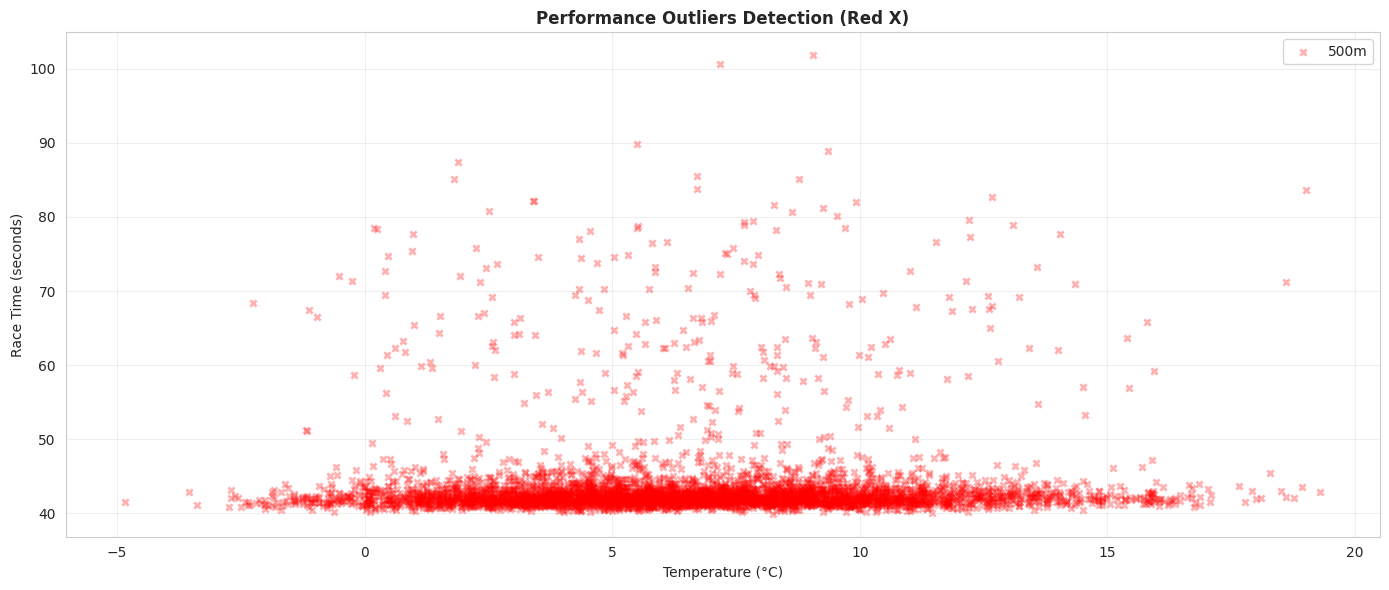

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Visualize outliers by location
fig, ax = plt.subplots(figsize=(14,6))

for distance in df_clean['Distance_Meters'].unique()[:3]:
  subset = df_clean[df_clean['Distance_Meters']==distance]
  outlier_subset = df_outliers[df_outliers['Distance_Meters']==distance]
  ax.scatter(subset['Temperature_c'],subset['Time'],alpha=0.3,label=f"{int(distance)}m",s=20,color='red',marker='x',linewidths=2)

ax.set_title("Performance Outliers Detection (Red X)",fontweight='bold', fontsize=12)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Race Time (seconds)')
ax.legend()
ax.grid(True,alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig('outliers_detection.png',dpi=300,bbox_inches='tight')

## 8. Rink Speed Index Calculation

In [ ]:
# Calculate league mean by distance
league_means = df_clean.groupby('Distance_Meters')['Time'].mean()

# Calculate venue performance
venue_stats = []

for location in df_clean['Location_Key'].unique():
  loc_data = df_clean[df_clean['Location_Key']==location]

  for distance in loc_data['Distance_Meters'].unique():
    dist_data = loc_data[loc_data['Distance_Meters']==distance]

    if len(dist_data)>=3:
      avg_time = dist_data['Time'].mean()
      league_mean = league_means[distance]
      deviation = ((league_mean - avg_time) / league_mean) * 100

      venue_stats.append({
          'Location': location,
          'City': dist_data['City'].iloc[0],
          'Country': dist_data['Country'].iloc[0],
          'Distance_m' : int(distance),
          'Avg_Time_s': avg_time,
          'League_Mean_s': league_mean,
          'Deviation_pct': deviation,
          'Num_Races': len(dist_data),
          'Altitude_m': dist_data['Altitude_m'].iloc[0],
          'Avg_Temp_C': dist_data['Temperature_c'].mean()
      })

  df_rink_index = pd.DataFrame(venue_stats)

In [ ]:
# Calculate overall Rink Speed Index
df_rink_index['Rink_Speed_Index'] = df_rink_index['Deviation_pct']

# Rank rinks
df_rink_index = df_rink_index.sort_values(by='Rink_Speed_Index',ascending=False)

print("Top 10 Fastest Rinks: ")
df_rink_index

Top 10 Fastest Rinks: 


,Location,City,Country,Distance_m,Avg_Time_s,League_Mean_s,Deviation_pct,Num_Races,Altitude_m,Avg_Temp_C,Rink_Speed_Index
15,Toronto_CAN,Toronto,CAN,500,42.298212,43.633285,3.059759,170,1396,3.210772,3.059759
6,Moscow_RUS,Moscow,RUS,500,42.585274,43.633285,2.401863,117,1724,6.771346,2.401863
13,"SaltLakeCity,UT_USA","SaltLakeCity,UT",USA,500,42.908312,43.633285,1.661514,234,1482,2.683051,1.661514
5,Dordrecht_NED,Dordrecht,NED,500,43.033062,43.633285,1.375607,256,1095,6.883649,1.375607
14,Erzurum_TUR,Erzurum,TUR,500,43.146135,43.633285,1.116465,89,87,13.822309,1.116465
8,Calgary_CAN,Calgary,CAN,500,43.224362,43.633285,0.937181,370,1638,2.755776,0.937181
3,Montreal_CAN,Montreal,CAN,500,43.259733,43.633285,0.856116,559,1294,6.541164,0.856116
2,Dresden_GER,Dresden,GER,500,43.418256,43.633285,0.492809,464,860,8.929799,0.492809
7,Seoul_KOR,Seoul,KOR,500,43.716715,43.633285,-0.191206,382,1044,7.463483,-0.191206
12,Kolomna_RUS,Kolomna,RUS,500,43.939091,43.633285,-0.700855,198,330,9.794788,-0.700855


## 9. Statistical Correlation Analysis

<Axes: >

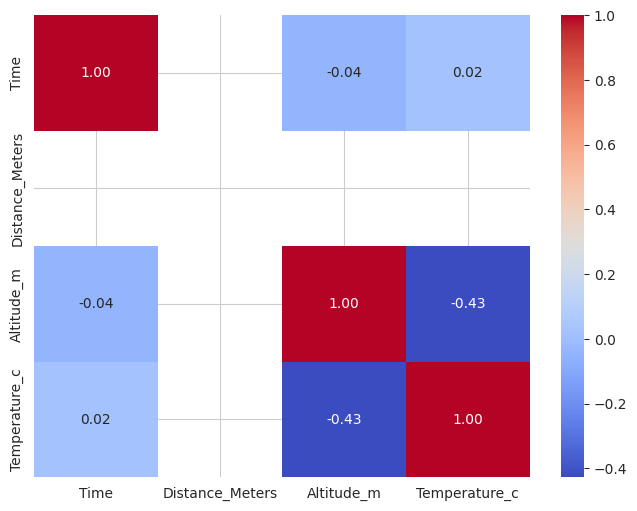

In [ ]:
# Correlation Matrix
correlation_vars = ['Time','Distance_Meters','Altitude_m','Temperature_c']
correlation_matrix = df_clean[correlation_vars].corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',ax=ax)

10. Export Data for Dashboard

In [ ]:
dashboard_data = df_clean.copy()

dashboard_data.to_csv('dashboard_main_data.csv',index=False)

# Export Rink Speed Index
df_rink_index.to_csv('rink_speed_index.csv',index=False)

In [ ]:
print("Analysis completed!")

Analysis completed!
